In [1]:
# ! pip install imbalanced-learn
# ! pip install lightgbm

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve



warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
notebook = 'lab'
if notebook == 'gram':
    path_dir = os.chdir('E:\me\공부\머신러닝\파머완\분류')
else:
    path_dir = os.chdir('D:\me\공부\머신러닝\파머완\분류')

# 데이터 호출

In [4]:
card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


# 데이터 탐색

In [5]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(card_df.Class.value_counts()/len(card_df))

0    0.998273
1    0.001727
Name: Class, dtype: float64


# 데이터 분포 확인

## 데이터 scale 변환

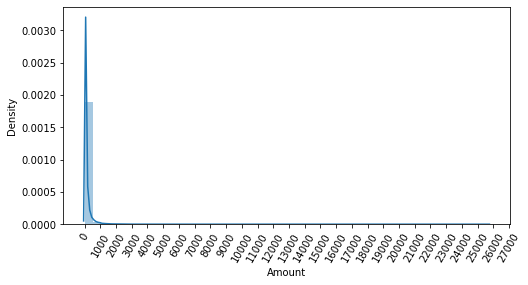

In [8]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])
plt.show()

### 1. 표준화

In [9]:
def ss_features_df(df = None):
    '''표준화 함수'''
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DF 맨앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Amount'], axis=1, inplace=True)
    return df_copy

In [10]:
stand_card = ss_features_df(card_df)

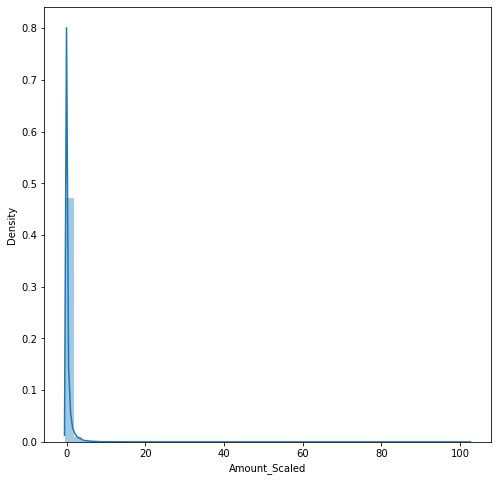

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(stand_card['Amount_Scaled'])
plt.show()

In [12]:
max(stand_card['Amount_Scaled'])

102.36224270928423

In [13]:
print(f'Amount_Standard 최대값', max(stand_card['Amount_Scaled']))
print(f'Amount_Standard 최소값', min(stand_card['Amount_Scaled']))

Amount_Standard 최대값 102.36224270928423
Amount_Standard 최소값 -0.35322939296682354


### 2. log변환

In [14]:
def log_scaled(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Amount'], axis=1, inplace=True)
    return df_copy 

In [15]:
log_card = log_scaled(card_df)

<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

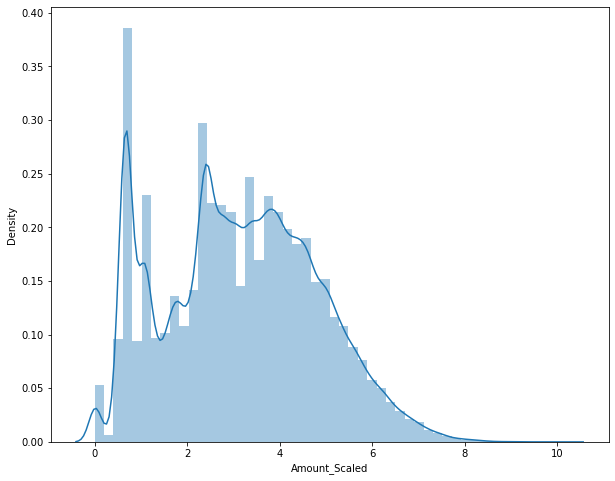

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(log_card['Amount_Scaled'])

In [17]:
print(f'Amount_Standard 최대값', max(log_card['Amount_Scaled']))
print(f'Amount_Standard 최소값', min(log_card['Amount_Scaled']))

Amount_Standard 최대값 10.153941165977784
Amount_Standard 최소값 0.0


## 이상치 확인

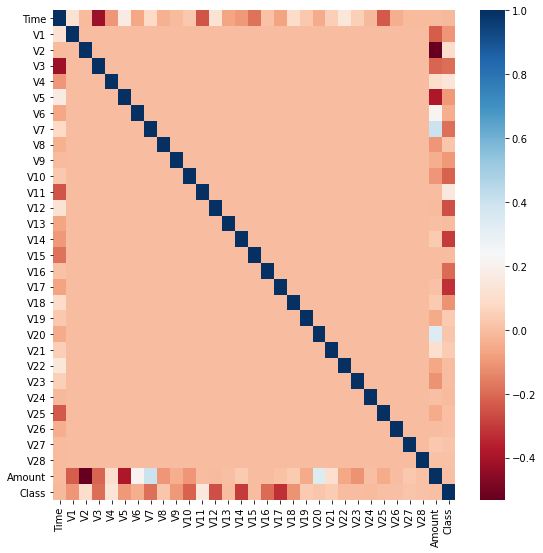

In [18]:
plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')
plt.show()

In [19]:
def outlier(df=None, column = None, weight = 1.5):
    df_copy = df.copy()
    fraud = df_copy[df_copy['Class']==1][column]
    
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    print(f'이상치 인덱스: {outlier_index}')
    
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [20]:
card_copy = outlier(log_card, 'V14')

이상치 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


# 데이터 분할

In [21]:
x_features = card_df.iloc[:, :-1]
y_label = card_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=824, stratify = y_label)

In [22]:
print(y_train.value_counts()/len(y_train))
print('\n','#'*40,'\n')
print(y_test.value_counts()/len(y_test))

0    0.998271
1    0.001729
Name: Class, dtype: float64

 ######################################## 

0    0.99828
1    0.00172
Name: Class, dtype: float64


# SMOTE over sampling

반드시 학습 데이터 세트만 오버 샘플링해야 함.

In [23]:
smote = SMOTE(random_state=824)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (227845, 30) (227845,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (454902, 30) (454902,)
SMOTE 적용 후 레이블 값 분포:
 0    227451
1    227451
Name: Class, dtype: int64


# 모델링

In [24]:
lr_clf = LogisticRegression(random_state=824)
dt_clf = DecisionTreeClassifier(random_state=824)
rf_clf = RandomForestClassifier(n_estimators=500, random_state=824)
lgb_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, random_state=824) # boost_from_average: 데이터 불균형일때 사용

In [25]:
def modeling(x_train, x_test, y_train, y_test):
    ''' 데이터 학습 '''
    
    lr_clf.fit(x_train, y_train)
    lr_pred = lr_clf.predict(x_test)
    
    dt_clf.fit(x_train, y_train)
    dt_pred = dt_clf.predict(x_test)
    
    rf_clf.fit(x_train, y_train)
    rf_pred = rf_clf.predict(x_test)
    
    lgb_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric = 'auc', eval_set = [(x_test, y_test)])
    lgb_pred = lgb_clf.predict(x_test)
    
    return lr_pred, dt_pred, rf_pred, lgb_pred

# 평가

In [26]:
def testing(x_train, x_test, y_train, y_test):
    '''모델 평가'''
    start_time = time.time()
    lr_pred, dt_pred, rf_pred, lgb_pred = modeling(x_train, x_test, y_train, y_test)
    results = [lr_pred, dt_pred, rf_pred, lgb_pred]
    df = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'f1'])
    for result in results:
        confusion = confusion_matrix(y_test, result)
        accuracy = accuracy_score(y_test, result)
        precision = precision_score(y_test, result)
        recall = recall_score(y_test, result)
        f1 = f1_score(y_test, result)
        print('오차 행렬')
        print(confusion)
        print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')
        test_df = pd.DataFrame([[accuracy, precision, recall, f1]], columns = ['accuracy', 'precision', 'recall', 'f1'])
        df=df.append(test_df, ignore_index=True)
    df.index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']
    sec = time.time() - start_time
    times = str(datetime.timedelta(seconds = sec)).split('.')
    times = times[0]
    print(f'총 소요시간 {times}')
    return df

In [27]:
test_result = testing(x_train_over, x_test, y_train_over, y_test)

[1]	valid_0's auc: 0.965611	valid_0's binary_logloss: 0.602908
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.973322	valid_0's binary_logloss: 0.528781
[3]	valid_0's auc: 0.97309	valid_0's binary_logloss: 0.466845
[4]	valid_0's auc: 0.966298	valid_0's binary_logloss: 0.413962
[5]	valid_0's auc: 0.965944	valid_0's binary_logloss: 0.368912
[6]	valid_0's auc: 0.965935	valid_0's binary_logloss: 0.329475
[7]	valid_0's auc: 0.966118	valid_0's binary_logloss: 0.295228
[8]	valid_0's auc: 0.965887	valid_0's binary_logloss: 0.265497
[9]	valid_0's auc: 0.973359	valid_0's binary_logloss: 0.239184
[10]	valid_0's auc: 0.973011	valid_0's binary_logloss: 0.215777
[11]	valid_0's auc: 0.976104	valid_0's binary_logloss: 0.195222
[12]	valid_0's auc: 0.976178	valid_0's binary_logloss: 0.176808
[13]	valid_0's auc: 0.979315	valid_0's binary_logloss: 0.160512
[14]	valid_0's auc: 0.978646	valid_0's binary_logloss: 0.145883
[15]	valid_0's auc: 0.978883	valid_0's binary_loglos

[126]	valid_0's auc: 0.984181	valid_0's binary_logloss: 0.00270017
[127]	valid_0's auc: 0.984217	valid_0's binary_logloss: 0.00269573
[128]	valid_0's auc: 0.984363	valid_0's binary_logloss: 0.0026864
[129]	valid_0's auc: 0.984541	valid_0's binary_logloss: 0.00268616
[130]	valid_0's auc: 0.984314	valid_0's binary_logloss: 0.00270021
[131]	valid_0's auc: 0.984009	valid_0's binary_logloss: 0.00270722
[132]	valid_0's auc: 0.984003	valid_0's binary_logloss: 0.00271074
[133]	valid_0's auc: 0.983754	valid_0's binary_logloss: 0.00271038
[134]	valid_0's auc: 0.983522	valid_0's binary_logloss: 0.00272414
[135]	valid_0's auc: 0.983449	valid_0's binary_logloss: 0.0027386
[136]	valid_0's auc: 0.983778	valid_0's binary_logloss: 0.00273456
[137]	valid_0's auc: 0.983884	valid_0's binary_logloss: 0.00272844
[138]	valid_0's auc: 0.983706	valid_0's binary_logloss: 0.00273165
[139]	valid_0's auc: 0.983595	valid_0's binary_logloss: 0.00273822
[140]	valid_0's auc: 0.983706	valid_0's binary_logloss: 0.002753

In [28]:
test_result

,accuracy,precision,recall,f1
Logistic Regression,0.980074,0.073251,0.908163,0.135567
Decision Tree,0.997858,0.435484,0.826531,0.570423
Random Forest,0.999561,0.910112,0.826531,0.866310
LightGBM,0.999579,0.920455,0.826531,0.870968
